<a href="https://colab.research.google.com/github/playeredlc/treinamento-h2ia/blob/master/Aprendizado-Maquina/kmeans_clusterizacao_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Implementação do algoritmo de aprendizado não-supervisionado K-Means
# Aplicar a clusterização ao dataset de Ìris.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import math
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# *Load and explore the dataset*
https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [3]:
iris_dataset = load_iris()

In [4]:
print(dir(iris_dataset))

print(iris_dataset.feature_names)
print(iris_dataset.DESCR)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.419

In [5]:
X = iris_dataset.data
X_std = StandardScaler().fit_transform(X)

y = iris_dataset.target
target_names = iris_dataset.target_names

data = pd.DataFrame(data=X_std, columns=iris_dataset.feature_names)
data['target'] = y
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [6]:
print(data.count(), '\n')
print(pd.isnull(data.any()), '\n')
print(data.info())

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
target               150
dtype: int64 

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
target               False
dtype: bool 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


# Applying Principal Component Analysis (PCA)
https://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca


In [7]:
# applying the PCA to represent the dataset with 2 dimensions instead of 4
# https://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X_std)
print(str(pca.explained_variance_))

[4.22824171 0.24267075]


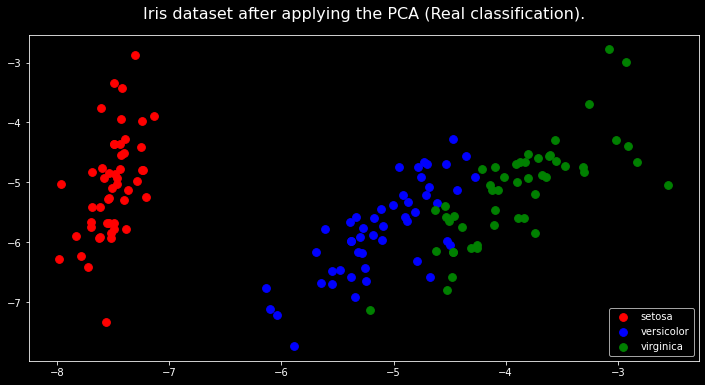

In [8]:
plt.style.use('dark_background')
plt.figure(figsize=[12, 6])
plt.title('Iris dataset after applying the PCA (Real classification).', fontsize=16, pad=16)

colors = ['red', 'blue', 'green']
for color, i, target_name in zip(colors, [0,1,2], target_names):
  plt.scatter(X_r[y==i, 0], X_r[y==i, 1], color=color, label=target_name, s=60)
plt.legend(loc='best')

plt.show()

In [9]:
np.random.randint(0, 149)

77

# K-Means algorithm

In [10]:
class K_means():
  def __init__(self, k, data):
    self.k = k
    self.data = self.init_data(data)
    self.clusters = self.init_clusters()
  
  def init_data(self, data):
    cols = ['x', 'y']
    df = pd.DataFrame(data=data, columns=cols)
    df = df.assign(cluster=None)

    return df

  def init_clusters(self):
    rand_indexes = np.random.randint(0, self.data.shape[0]-1, size=self.k)
    clusters = []

    for index in rand_indexes:
      centroid = [self.data.iloc[index].x, self.data.iloc[index].y]
      clusters.append(centroid)

    return np.array(clusters)
  
  def assign_to_clusters(self):
    for index, row in self.data.iterrows():
      data_point = np.array([row['x'], row['y']])
      nearest_cluster = self.calc_nearest_cluster(data_point)
      self.data.at[index, 'cluster'] = nearest_cluster
  
  def calc_nearest_cluster(self, data_point):
    nearest_dist = math.inf
    for i in range(self.k):
      dist = self.calc_euclidean_distance(self.clusters[i], data_point)
      if(dist < nearest_dist):
        nearest_dist = dist
        nearest_cluster = i
      
    return nearest_cluster

  def calc_euclidean_distance(self, cluster_coord, data_coord):
    dist = np.linalg.norm(cluster_coord - data_coord)
    
    return dist

  def recalculate_centroids(self):    
    for i in range(self.k):
      cl = self.data[self.data['cluster'] == i]
      x_mean = cl.x.sum() / cl.x.count()
      y_mean = cl.y.sum() / cl.y.count()
      self.clusters[i] = np.array([x_mean, y_mean])

  def kmeans(self):
    self.assign_to_clusters()
    it=0
    while(True):
      old_centroids = np.copy(self.clusters)
      self.recalculate_centroids()
      if(np.array_equal(old_centroids, self.clusters)):
        # no change in the centroids, algorithm should stop now
        break      
      self.assign_to_clusters()
      it+=1

    print(f'KMeans completed.\nNumber of iterations: {it}\nTotal clusters: {self.k}')
  
  # 
  # TODO
  # 
  # elbow_method for determining the best value for k
  # 

In [11]:
kmeans = K_means(3, X_r)
kmeans.kmeans()

KMeans completed.
Number of iterations: 6
Total clusters: 3


In [12]:
cls0 = kmeans.data[kmeans.data['cluster'] == 0]
cls1 = kmeans.data[kmeans.data['cluster'] == 1]
cls2 = kmeans.data[kmeans.data['cluster'] == 2]

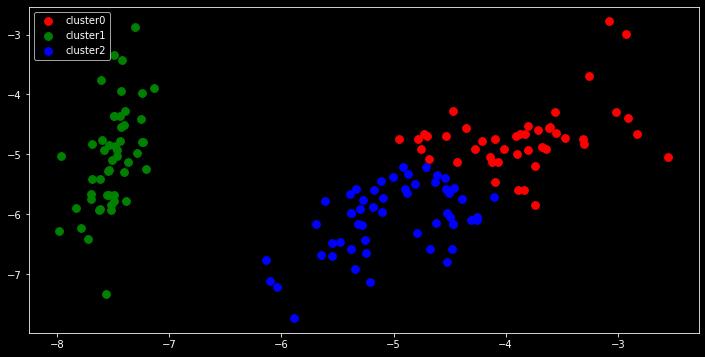

In [13]:
plt.style.use('dark_background')
plt.figure(figsize=[12, 6])

plt.scatter(cls0.x, cls0.y, color='red', label='cluster0', s=60)
plt.scatter(cls1.x, cls1.y, color='green', label='cluster1', s=60)
plt.scatter(cls2.x, cls2.y, color='blue', label='cluster2', s=60)

plt.legend(loc='best')
plt.show()